In [2]:
import numpy as np 

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style("darkgrid")

import warnings 
warnings.filterwarnings("ignore")


In [3]:
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

## Load Dataset 

In [4]:
df = pd.read_csv("../input/islr-default/ISLR_default.csv")
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
df["default2"] = df["default"].apply(lambda x : 0 if x == "No" else 1)
df["student2"] = df["student"].apply(lambda x: 0 if x == "No" else 1)
df.head()

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [6]:
# take a fraction of the samples where target value is "no"
df_no = df[df["default2"] == 0].sample(frac=0.15)
# Take all samples where target value is "yes"
df_yes = df[df["default2"] == 1]
df_ = df_no.append(df_yes)


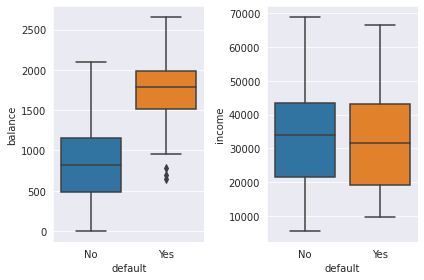

In [7]:
fig, ax = plt.subplots(1, 2)

sns.boxplot(x = "default", y = "balance", data = df_, ax = ax[0])
sns.boxplot(x = "default", y = "income", data = df_, ax = ax[1])
fig.tight_layout()
plt.show()


From the observation, we can observe that:
<li>A higher balance will more likely lead to default</li>
<li>A higher income will less likely lead to default </li>

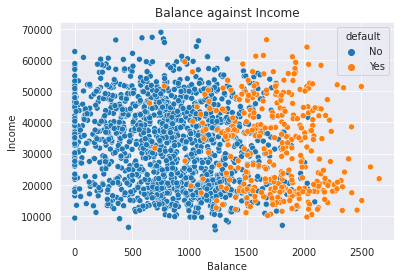

In [8]:
plt.title("Balance against Income")
plt.xlabel("Balance")
plt.ylabel("Income")
sns.scatterplot(x = "balance", y = "income", hue = "default", data = df_)
plt.show()

We can observe that for the same level of income, 
people who default have higher balance in general

## Preparing the data for Logistic Regression

In [9]:
df["balance"].values.reshape(-1, 1)

array([[ 729.52649521],
       [ 817.18040656],
       [1073.54916401],
       ...,
       [ 845.41198922],
       [1569.00905338],
       [ 200.92218263]])

In [10]:
x_train = df["balance"].values.reshape(-1, 1)
y = df["default2"]
x_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y)
y_pred = clf.predict_proba(x_test)


In [12]:
y_pred

array([[9.99976331e-01, 2.36688219e-05],
       [9.99976201e-01, 2.37993302e-05],
       [9.99976069e-01, 2.39305580e-05],
       ...,
       [1.92313320e-02, 9.80768668e-01],
       [1.91278880e-02, 9.80872112e-01],
       [1.90249897e-02, 9.80975010e-01]])

In [13]:
df.head()

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


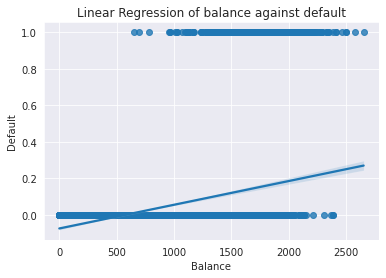

In [14]:
sns.regplot(x = df["balance"], y = df["default2"])
plt.title("Linear Regression of balance against default")
plt.xlabel("Balance")
plt.ylabel("Default")
plt.show()

Fitting the best fit line in a classification of default using balance 

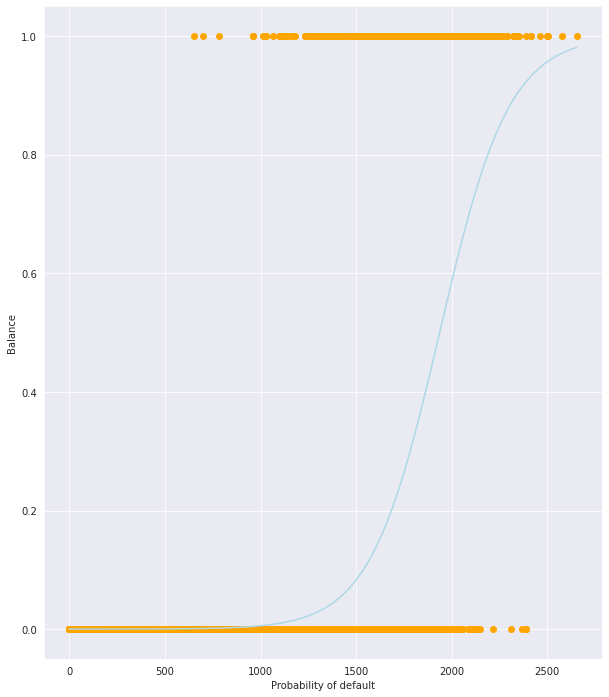

In [15]:
# logistic regression plot
ax = plt.figure(figsize = (10, 12))
plt.plot(x_test, y_pred[:, 1], color = "lightblue")
plt.scatter(x_train, y, color = "orange")
plt.ylabel("Balance")
plt.xlabel("Probability of default")
plt.show()

Description: 

-Using the training values of balance, and y as whether it defaults or not

-Generate all values of balance from minimum to maximum and predict its probability, plotting its probability as above.

-It is DIFFERENT from the straight line plot because that is using a line of best fit.

## Univariate feature (Balance only)

Here, I will try proving the coefficients as well as the model stats

In [16]:
print("All outcomes: {}".format(clf.classes_))
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

All outcomes: [0 1]
Coefficients: [[0.00549892]]
Intercept: [-10.65132824]


Remember the logit function? 

$ p(X) = \dfrac{e^y}{1 + e^y} $

where 

$ y = \beta_0 + \beta_1x_1 $


### lets try it using our model

In [17]:
# lets try it using our model 
df.sample(1)

,default,student,balance,income,default2,student2
7771,No,No,715.544076,50127.955632,0,0


In [18]:
pred = clf.predict_proba(np.array([1250.679653]).reshape(-1, 1))
print("Probability of the sampled is:", pred)


Probability of the sampled is: [[0.97755412 0.02244588]]


### Try it using a calculator, its the same!

## Multiple Logistic Regression

In [40]:
X_train = df[df.student == 'Yes'].balance.values.reshape(df[df.student == 'Yes'].balance.size,1) 

In [41]:
X_train

array([[817.18040656],
       [919.58853047],
       [808.6675043 ],
       ...,
       [999.28111198],
       [172.41298748],
       [200.92218263]])

In [53]:
# using features:
# students, balance 

# here we cannot fit both balance and students into the model because for our test data, we do not have the student attribute.

# they are students 
x_train = df[df["student"] == "Yes"].loc[:, "balance"].values.reshape(-1, 1)
y_train = df[df["student"] == "Yes"]["default2"].values.reshape(-1, 1)

# they are not students 
x_train2 = df[df["student"] == "No"].loc[:, "balance"].values.reshape(-1, 1)
y_train2 = df[df["student"] == "No"]["default2"].values.reshape(-1, 1)


In [66]:
clf1 = LogisticRegression()
clf2 = LogisticRegression()

clf1.fit(x_train, y_train)
clf2.fit(x_train2, y_train2)

prob1 = clf1.predict_proba(x_test)
prob2 = clf2.predict_proba(x_test)

In [67]:
prob1[:, 1].shape

(2655,)

In [90]:
# overall student default rate 
overall_students = len(df.loc[df["student"] == 'Yes'])
non_students = len(df) - overall_students
students_who_default = len(df.loc[(df["student"] == "Yes") & (df["default"] == "Yes")])
non_students_who_default = len(df.loc[(df["student"] == "No") & (df["default"] == "Yes")])

print("Overall number of students: ", overall_students)
print("Overall number of non_students", non_students)
print("Students who default: ", students_who_default)
print("Non students who default: ", non_students_who_default)


non_students_default_rate = non_students_who_default / non_students
students_default_rate = students_who_default / overall_students

Overall number of students:  2944
Overall number of non_students 7056
Students who default:  127
Non students who default:  206


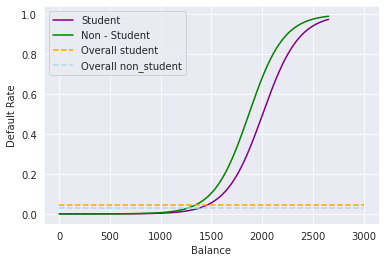

In [94]:
plt.plot(x_test, prob1[:, 1], color = "purple", label = "Student")
plt.plot(x_test, prob2[:, 1], color = "green", label = "Non - Student")
plt.hlines(students_default_rate, xmin = 0, xmax = 3000 , linestyles='dashed', color = "orange", label = "Overall student")
plt.hlines(non_students_default_rate, xmin = 0, xmax = 3000 , linestyles='dashed', color = "lightblue", label = "Overall non_student")
plt.xlabel("Balance")
plt.ylabel("Default Rate")
plt.legend()
plt.show()

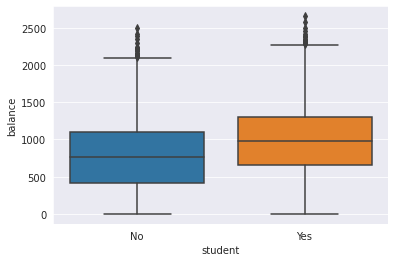

In [93]:
sns.boxplot(x = "student", y = "balance", data = df)
plt.show()

From the boxplot, we can establish that students generally have higher balance.


From the Logistic regression curve, we can conclude that for a certain amount of balance, non-students have a higher default rate.
One may conclude that being a non-student will have a higher rate of defaulting, while being a student will have a lower rate of defaulting.


But the overall student default rate seems to be higher (dashed line). 

Why? 

This is because from the boxplot, we can establish that students generally have higher balance. 

Conclusion: 

While being a non-student will increase my probability of defaulting, but, being a non-student would means my credit balance will tend to be smaller, leading to a lower probability of defaulting.

